
# CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs



# STEP 0: PROBLEM STATEMENT

CIFAR-10 Loading: The cifar10.load_data() function loads the CIFAR-10 dataset, which is split into 60,000 images. We normalize the pixel values to the range [0, 1] for better model performance and convert the labels into one-hot encoding using tf.keras.utils.to_categorical().

CNN Model: The model architecture uses three convolutional layers followed by max-pooling layers, a flatten layer, and dense layers for classification. The output layer has 10 units (one for each class in CIFAR-10) with a softmax activation for multi-class classification.

Data Augmentation: The ImageDataGenerator is used to perform real-time data augmentation. The augmentation includes rotation, width/height shift, shear, zoom, and horizontal flip.

Model Training: The model is trained using the augmented data generated by train_datagen.flow(). This allows real-time augmentation during the training process.

Model Saving: After training, the model is saved to a file in the saved_models directory with the name cifar10_trained_model_Augmentation.h5.

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [20]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
X_test.shape

(10000, 32, 32, 3)

In [23]:
y_train.shape

(50000, 1)

In [24]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[1]


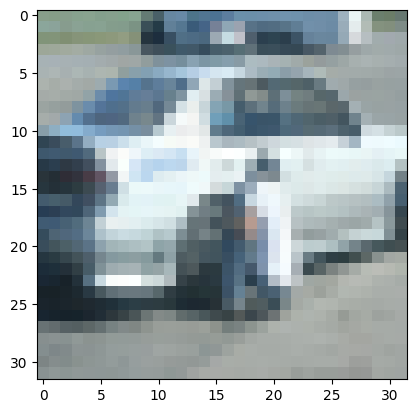

In [26]:
i = 30009
plt.imshow(X_train[i])
print(y_train[i])

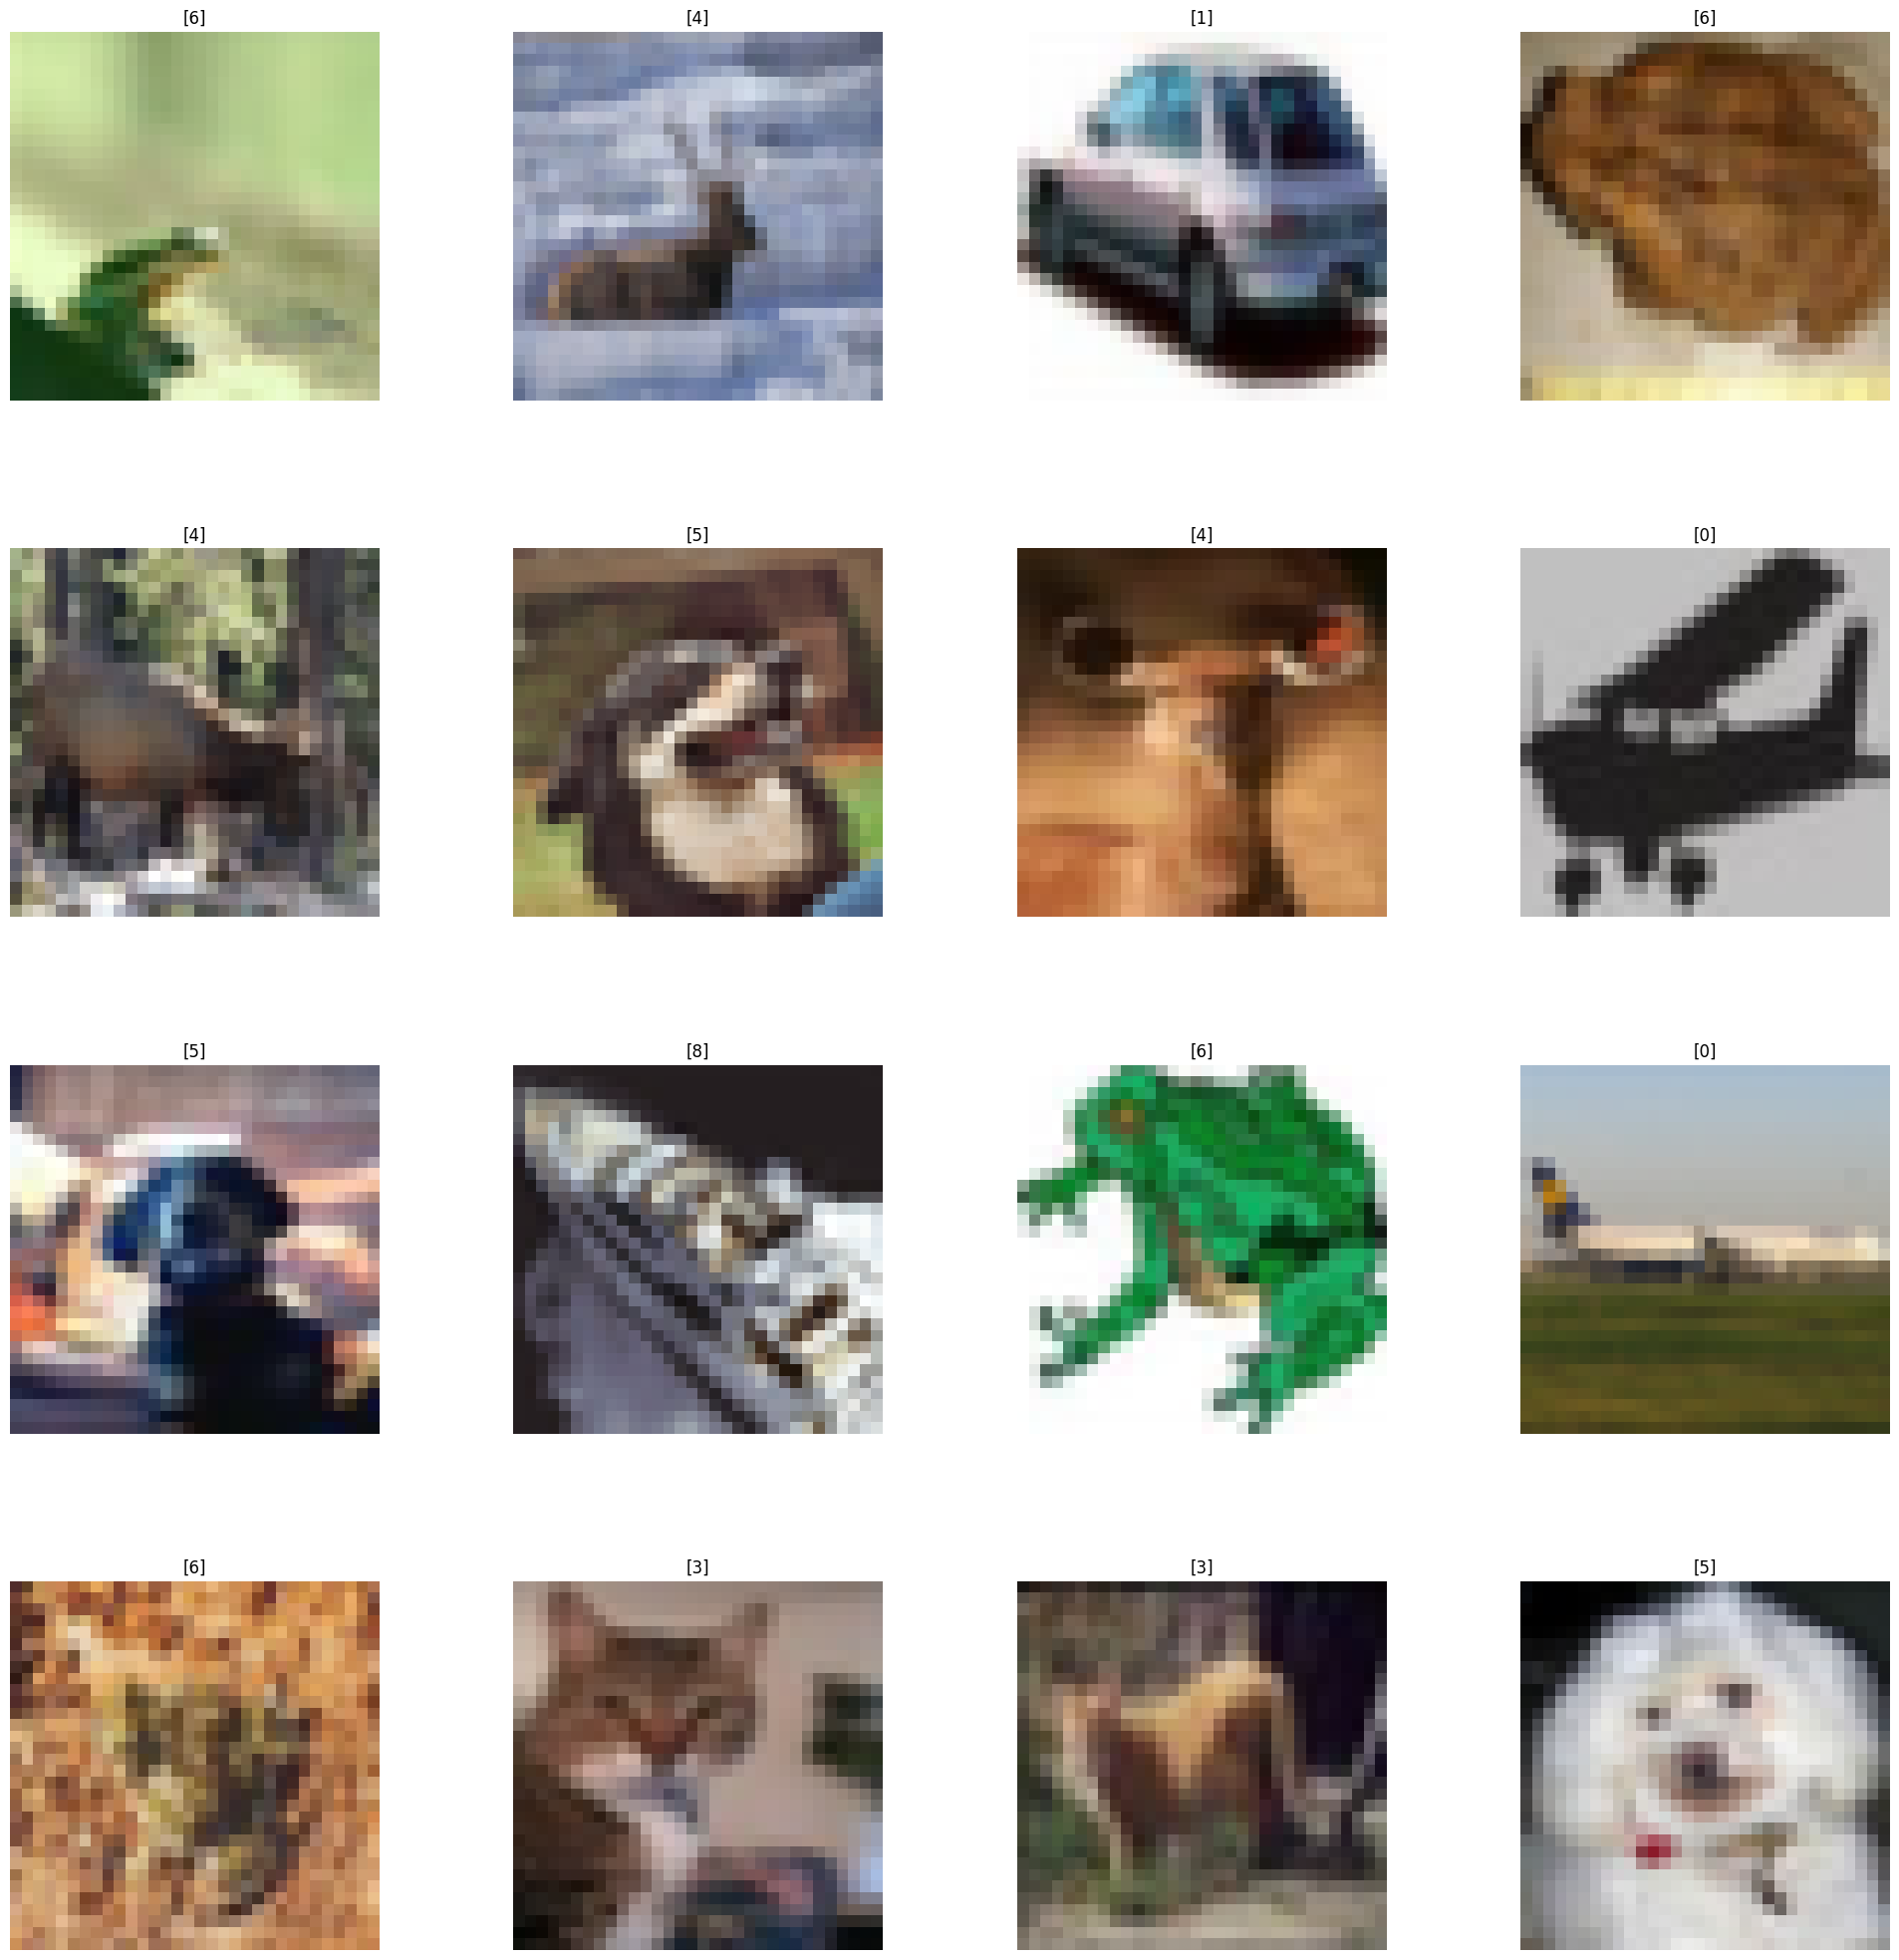

In [27]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [28]:
n_training

50000

# STEP #3: DATA PREPARATION

In [30]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [31]:
number_cat = 10

In [32]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [33]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [34]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [35]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [36]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [37]:
X_train = X_train/255
X_test = X_test/255


In [38]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [39]:
X_train.shape

(50000, 32, 32, 3)

In [40]:
Input_shape = X_train.shape[1:]

In [41]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [44]:
from tensorflow.keras.layers import Input

cnn_model = Sequential()
cnn_model.add(Input(shape=Input_shape))  # Use Input layer here to specify input shape
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

In [45]:
cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
                  metrics=['accuracy'])

In [46]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 121ms/step - accuracy: 0.3111 - loss: 1.8587


# STEP #5: EVALUATE THE MODEL

In [48]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.5847 - loss: 1.1682
Test Accuracy: 0.5885999798774719


In [49]:
# Predict the class probabilities for each test sample
predicted_probabilities = cnn_model.predict(X_test)

# Convert probabilities to class labels by choosing the class with the highest probability
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Show the predicted class labels
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step


array([3, 0, 0, ..., 5, 4, 7], dtype=int64)

In [77]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [79]:
y_test = y_test.argmax(1)

In [81]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

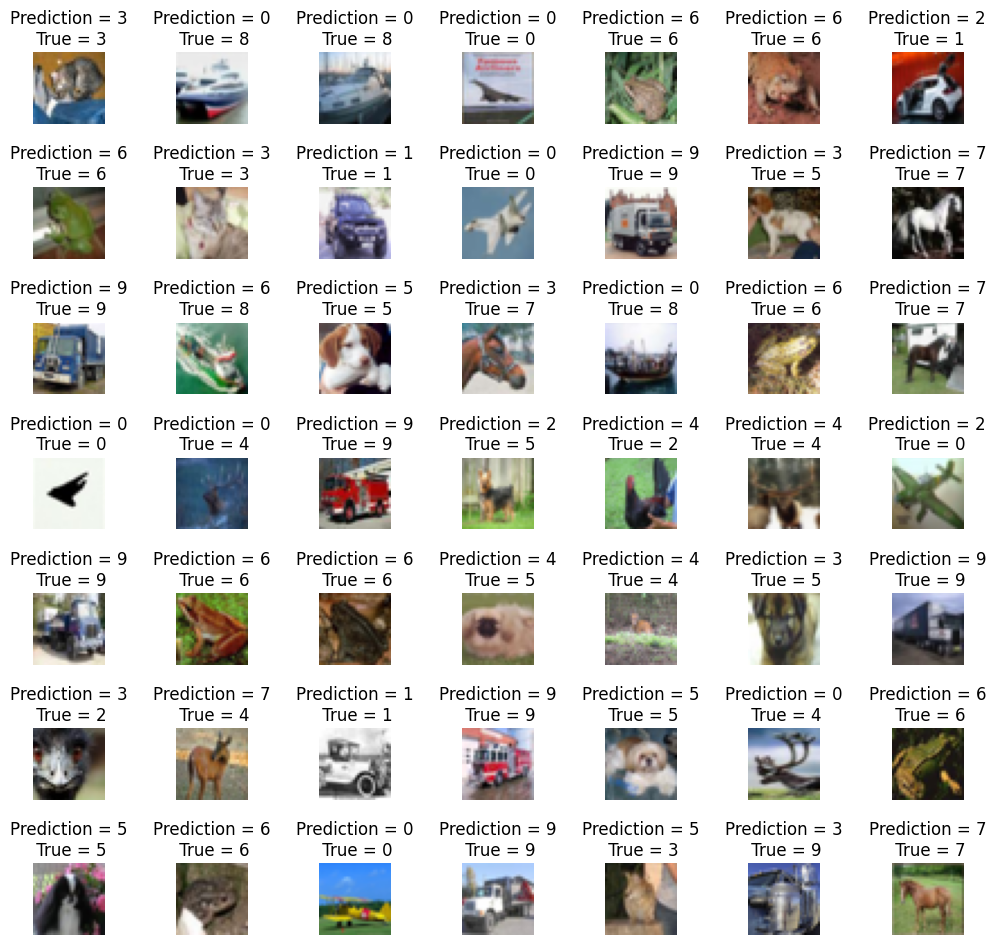

In [83]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

<Axes: >

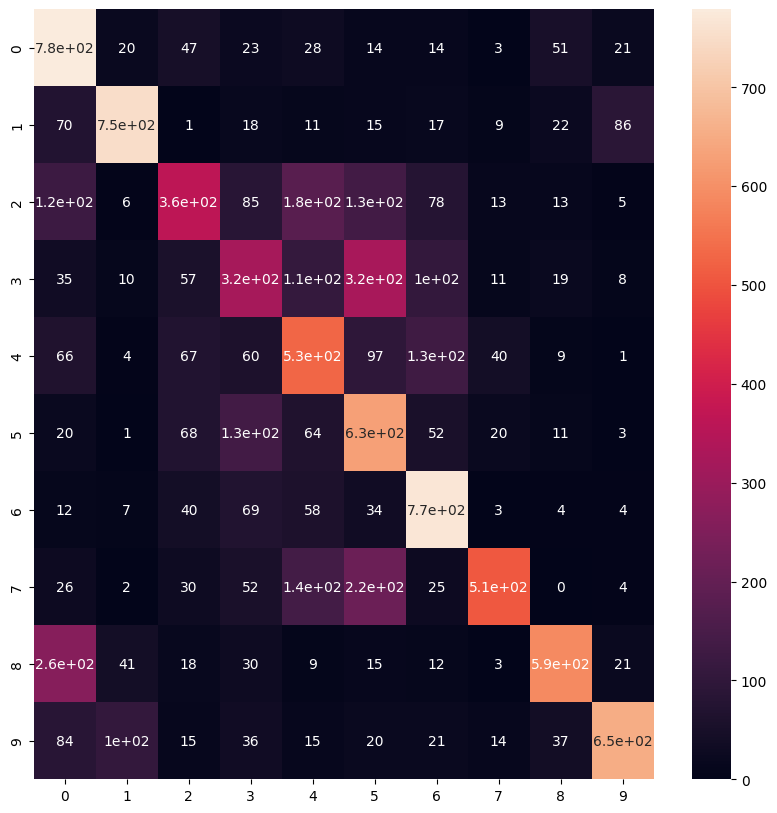

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL

In [86]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [93]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [95]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [97]:
X_train.shape

(50000, 32, 32, 3)

In [99]:
n = 8 
X_train_sample = X_train[:n]

In [101]:
X_train_sample.shape

(8, 32, 32, 3)

In [105]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example of using ImageDataGenerator for data augmentation
dataget_train = ImageDataGenerator(brightness_range=(1, 3))

# Fit the data generator on the training sample data (ensure X_train_sample is defined)
dataget_train.fit(X_train_sample)

In [109]:
!pip install Pillow

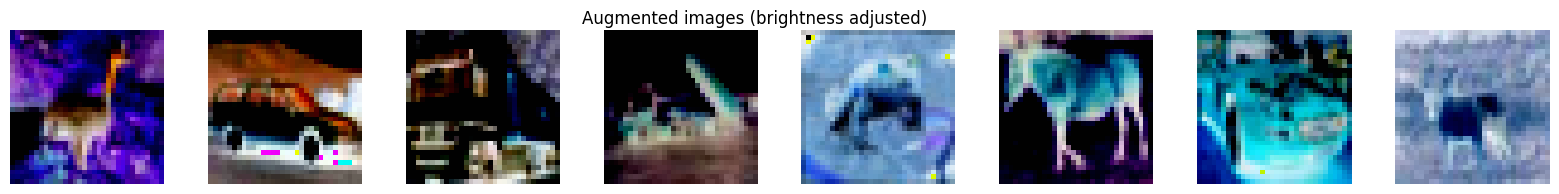

In [110]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Example data augmentation generator
dataget_train = ImageDataGenerator(brightness_range=(1, 3))

# Example input data, make sure X_train_sample is defined
# X_train_sample = ...

n = 8  # Set n to match the batch size (or smaller)
fig = plt.figure(figsize=(20, 2))

for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(x_batch.shape[0]):  # Ensure we only loop over the actual batch size
        ax = fig.add_subplot(1, n, i + 1)
        # Convert image to a displayable format
        img = Image.fromarray(np.uint8(x_batch[i] * 255))  # assuming images are normalized to [0, 1]
        ax.imshow(img)
        ax.axis('off')  # Hide axes
    fig.suptitle('Augmented images (brightness adjusted)')
    plt.show()
    break


# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [116]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with various augmentations
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [118]:
datagen.fit(X_train)

In [120]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)

In [122]:
cnn_model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32), epochs=2)

Epoch 1/2


C:\Users\Abhishek\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 126ms/step - accuracy: 0.2430 - loss: 5.2534
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 127ms/step - accuracy: 0.3325 - loss: 1.8656


In [124]:
from tensorflow.keras.utils import to_categorical

# One-hot encode y_test
y_test_encoded = to_categorical(y_test, num_classes=10)

# Evaluate the model
score = cnn_model.evaluate(X_test, y_test_encoded)
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.3712 - loss: 1.7663
Test accuracy: 0.3718999922275543


In [126]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)

In [128]:
import os
from tensorflow.keras.models import load_model

# Define the directory where you want to save the model
directory = os.path.join(os.getcwd(), 'saved_models')

# Check if the directory exists, and create it if it doesn't
if not os.path.isdir(directory):
    os.makedirs(directory)

# Define the full path for the model
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')

# Save the model
cnn_model.save(model_path)

print(f"Model saved to {model_path}")

Model saved to C:\Users\Abhishek\OneDrive\ayadhya data mining\Manipal Academy Of Higher Education\VNIT\saved_models\keras_cifar10_trained_model_Augmentation.h5


# GREAT JOB! 